# About Dataset
The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

* 1 Customer ID: A unique identifier for each customer
* 2 Surname: The customer's surname or last name
* 3 Credit Score: A numerical value representing the customer's credit score
* 4 Geography: The country where the customer resides (France, Spain or Germany)
* 5 Gender: The customer's gender (Male or Female)
* 6 Age: The customer's age.
* 7 Tenure: The number of years the customer has been with the bank
* 8 Balance: The customer's account balance
* 9 NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
* 10 HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
* 11 IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
* 12 EstimatedSalary: The estimated salary of the customer
* 13 Exited: Whether the customer has churned (1 = yes, 0 = no)

In [39]:
# importing all needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split , cross_val_score , RandomizedSearchCV
from sklearn.metrics import  r2_score, mean_absolute_error, mean_squared_error , accuracy_score , confusion_matrix
from sklearn.preprocessing import  MinMaxScaler ,StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline   
from collections import Counter
from sklearn.metrics import classification_report


In [40]:
df=pd.read_csv(r"Data/Churn_Modelling.csv")


In [41]:
# copying the orignal data 
tempdf=df.copy()

In [42]:
tempdf.shape

(10002, 14)

In [43]:
tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [44]:
tempdf.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [45]:
# since very small amount of data is missing we can drop it 
tempdf.dropna(inplace=True)
tempdf.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [46]:
# dropping irrelevant column 
tempdf.drop(columns=['RowNumber','CustomerId','Surname'])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


# Exploratory Data Analysis

In [47]:
numerical_columns=tempdf.select_dtypes(include=['int','float'])

<Axes: xlabel='CreditScore', ylabel='Count'>

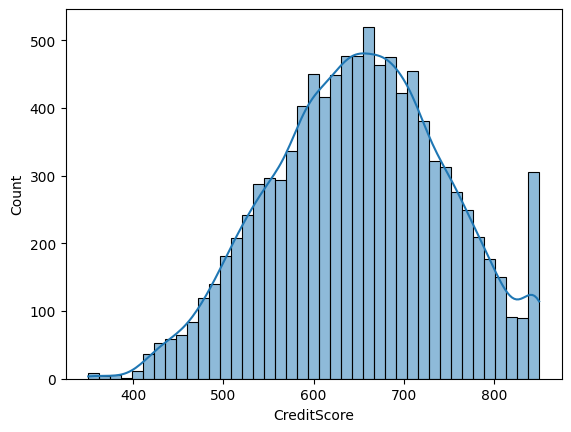

In [48]:
sns.histplot(data=tempdf,x='CreditScore',kde=True)

<Axes: xlabel='Age'>

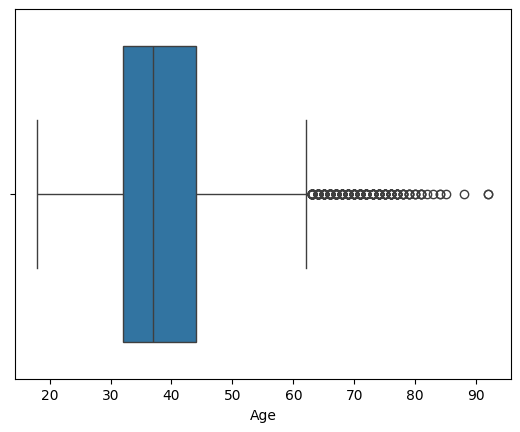

In [49]:
sns.boxplot(data=tempdf,x='Age')

<Axes: xlabel='Tenure', ylabel='Count'>

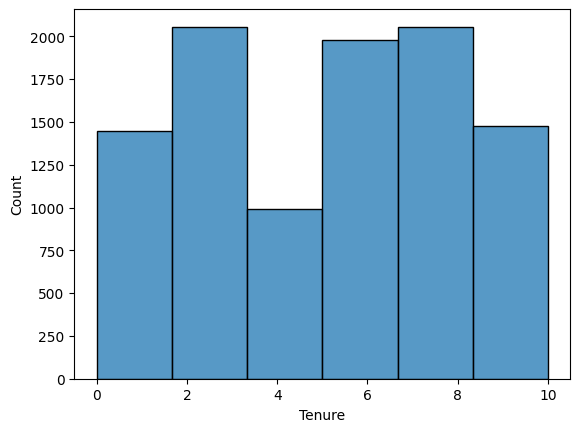

In [50]:
sns.histplot(data=tempdf,x='Tenure',bins=6)

In [51]:
tempdf['Geography'].value_counts()

Geography
France     5012
Germany    2510
Spain      2476
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Balance'>

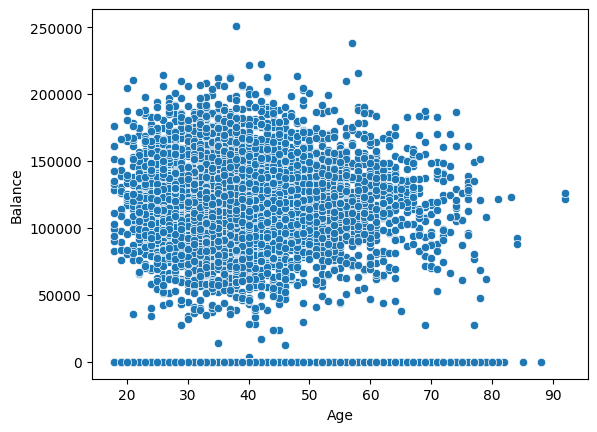

In [52]:
sns.scatterplot(data=tempdf,x='Age',y='Balance')

Text(0.5, 1.0, '0 = NO , 1 = Yes')

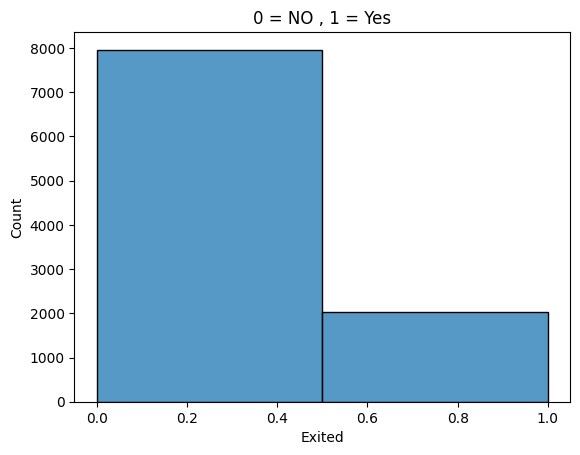

In [53]:
# we have imbalanced data in "Exited"
sns.histplot(data=tempdf,x='Exited',bins=2)
plt.title("0 = NO , 1 = Yes")

<Axes: >

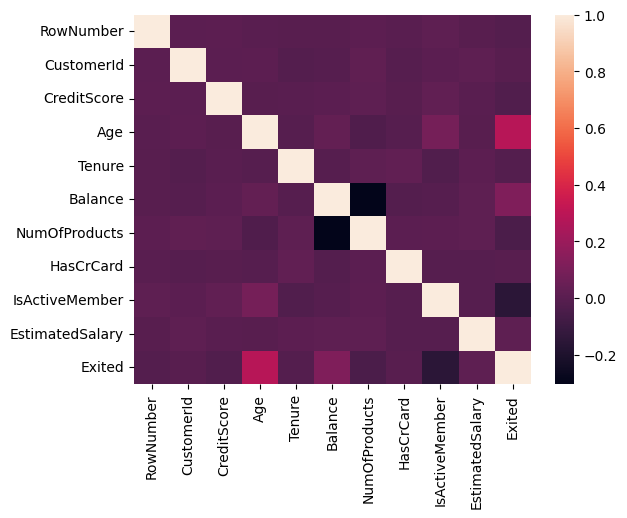

In [54]:
sns.heatmap(numerical_columns.corr())

# Preprocessing And Model Training

In [55]:
X=tempdf.drop(columns=['Exited'])
y=tempdf['Exited']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# importing all needed algorithm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

In [58]:
# creating columntransformer for applying transformation 
preprocessor=ColumnTransformer([
    ('OHE_Geography',OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first'),['Geography']),
    ('OHE_Gender',OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first'),['Gender']),
    ('Scaling_Features',MinMaxScaler(),['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary'])
])
model = RandomForestClassifier()

In [59]:
# creating pipeline 
Pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='minority')),
    ('model',model)
])


In [60]:
# we have handled the imbalaced data using smote
X_pre = preprocessor.fit_transform(X_train)
X_resampled, y_resampled = SMOTE().fit_resample(X_pre, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_resampled))


Before SMOTE: Counter({0: 6388, 1: 1610})
After SMOTE: Counter({0: 6388, 1: 6388})


In [61]:
# creating hyper parameters tuning grid 
param_grid = {
    'model__n_estimators': [100, 200, 300],         
    'model__max_depth': [None, 10, 20, 30],        
    'model__min_samples_split': [2, 5, 10],        
    'model__min_samples_leaf': [1, 2, 4],         
    'model__max_features': ['sqrt', 'log2'],        
    'model__bootstrap': [True, False] 
    }

In [62]:
# Using RandomizedSearchCV for hyper parameters tuning 
random_search=RandomizedSearchCV(
    estimator=Pipe,
    param_distributions=param_grid,      
    n_iter=20,                       
    cv=5,
    scoring='accuracy',
    n_jobs=-1                
)

In [63]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('OHE_Geography',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               ['Geography']),
                                                                              ('OHE_Gender',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               ['Gender']),
                                                                              ('Scaling_Features',
                                                                               MinMaxScaler(),
                                                                               ['CreditScore',...
                                             ('smote',
                                              SMOTE(sampling_strategy='minority')),
                                             ('model',
                                              RandomForestClassifier())]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__bootstrap': [True, False],
                                        'model__max_depth': [None, 10, 20, 30],
                                        'model__max_features': ['sqrt', 'log2'],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [100, 200, 300]},
                   scoring='accuracy')

# Model Evaluation

In [69]:
print("Best accuracy score:", random_search.best_score_*100)

Best accuracy score: 84.45855222013759


In [65]:
y_pred = random_search.predict(X_test)

In [71]:
print("Acurracy Score :", accuracy_score(y_test,y_pred)*100) 

Acurracy Score : 83.6


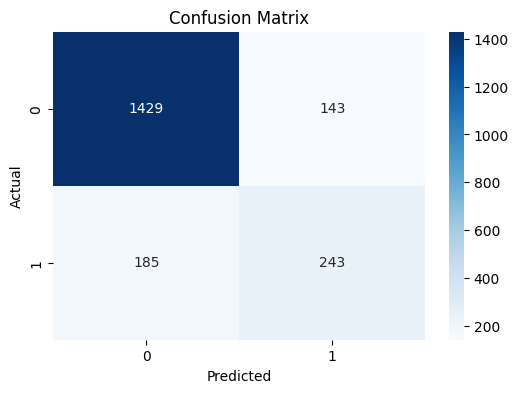

In [67]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1572
           1       0.63      0.57      0.60       428

    accuracy                           0.84      2000
   macro avg       0.76      0.74      0.75      2000
weighted avg       0.83      0.84      0.83      2000

